# Task 1

We want to implement the epsilon greedy algorithm. The purpose of the algorithm is to balance exploration with exploitation.

Epsilon greedy will pick the best option except for epsilon times every 100 trials.

In this task we want to explore a matrix where a row represent all the possible rewards that we can receive based on the state we are at the moment.


In [1]:
import numpy as np

epsilon = 0.5


def epsilon_greedy(s, q, epsilon=0.2):
    """Returns either the action that maximize the revard or a random one"""
    if np.random.rand() < epsilon:
        a = np.random.randint(q.shape[1])
    else:
        a = np.argmax(q[s, :])
    return a

# Matrix that we want to explore using epsilon greedy
q = np.array([[0, 1, 3, 4],
              [0, 7, 5, 5],
              [4, 1, 1, 4]])

# Each states correspond to a row in the q-matrix
states = range(q.shape[0])

for state in states:
    e_greedy_action = (epsilon_greedy(state, q))
    print(
        f'The epsilon-greedy action was: {e_greedy_action} while the best was: {np.argmax(q[state, :])}'
    )

The epsilon-greedy action was: 3 while the best was: 3
The epsilon-greedy action was: 1 while the best was: 1
The epsilon-greedy action was: 0 while the best was: 0


# Task 2

In a Reinforcement learning algorithm we want to decrease epsilon as we are gaining more knowledge of the algorithm. We want to implement a simple method to accomplish that.

After completing the task please try different values for epsilon and epsilon_decay.

In [5]:
epsilon = 0.5
epsilon_decay = 0.9
error_history = []
epsilon_history = []

for i in range(100):
    total_error = 0
    epsilon_history.append(epsilon)
    epsilon = epsilon * epsilon_decay
    for state in states:
        e_greedy_action = (epsilon_greedy(state, q, epsilon))
        total_error = total_error + q[state, np.argmax(q[state, :])] - q[state, e_greedy_action]
        print(
            f'The epsilon-greedy action was: {e_greedy_action} while the best was: {np.argmax(q[state, :])}'
        )
    error_history.append(total_error)


The epsilon-greedy action was: 1 while the best was: 3
The epsilon-greedy action was: 1 while the best was: 1
The epsilon-greedy action was: 2 while the best was: 0
The epsilon-greedy action was: 3 while the best was: 3
The epsilon-greedy action was: 1 while the best was: 1
The epsilon-greedy action was: 0 while the best was: 0
The epsilon-greedy action was: 3 while the best was: 3
The epsilon-greedy action was: 1 while the best was: 1
The epsilon-greedy action was: 0 while the best was: 0
The epsilon-greedy action was: 3 while the best was: 3
The epsilon-greedy action was: 1 while the best was: 1
The epsilon-greedy action was: 0 while the best was: 0
The epsilon-greedy action was: 3 while the best was: 3
The epsilon-greedy action was: 1 while the best was: 1
The epsilon-greedy action was: 0 while the best was: 0
The epsilon-greedy action was: 3 while the best was: 3
The epsilon-greedy action was: 0 while the best was: 1
The epsilon-greedy action was: 0 while the best was: 0
The epsilo

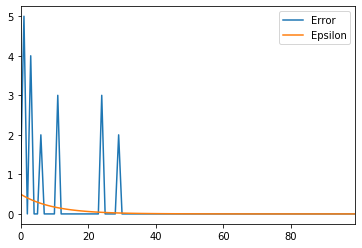

In [3]:
%matplotlib inline
import pandas as pd
error = pd.DataFrame({'Error': error_history, 'Epsilon': epsilon_history})
error.plot()
